# Part II - Loan DataSet from Prosper Analysis
## by PHILIP MWEMA

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I used some and not all of the set variables i.e loan status, term, etc

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('prosperLoanDataPart1.csv')

## Distribution of Loanees per term

> **Observation:** There are three types of loan terms provided by Prosper Loans, namely, 12 months, 36 months and 60 months.
From the visualization below mid term loans of 36 months are most preffered by loanees, followed by long term loans of 60 months and lastly short term loans are the least preffered by loanees.

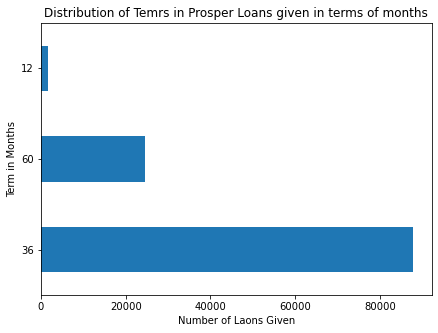

In [31]:
def univariate(column, kind, title, x, y, sizex, sizey):
    data[column].value_counts().plot(kind = kind,figsize=(sizex,sizey));
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

univariate('Term', 'barh','Distribution of Temrs in Prosper Loans given in terms of months', 'Number of Laons Given', 'Term in Months', 7, 5)

## NUMBER OF LOANS PER YEAR

> From the presentaions below, 2013 leads in the number of loans given out in a year, followed by 2012 while 2005 and 2009 have the least number of loans given out in a particular year.

In [22]:
def bivariate(column, kind, title, x, y, sizex, sizey):
    data[column].value_counts().plot(kind = kind,figsize=(sizex,sizey));
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

def term(column, duration, column2, kind, figx, figy):
    data[data[column] == duration].groupby([column, column2]).size().plot(kind=kind, figsize = (figx,figy));
    
## Converting Date type to DateTime and creating a column just for year alone.

data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'])
data['Year'] = data['ListingCreationDate'].dt.year

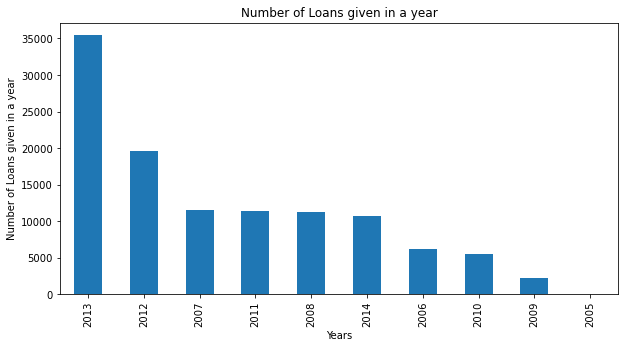

In [23]:
bivariate('Year', 'bar','Number of Loans given in a year', 'Years', 'Number of Loans given in a year', 10, 5 )

## Average Income per Household for each Term and Loan Status

>**Observation**: From the heat map we can draw coclusion that Individuals with higher incomes took short term loans and are more likely for late payments of past due, mostly 1 - 15 days.

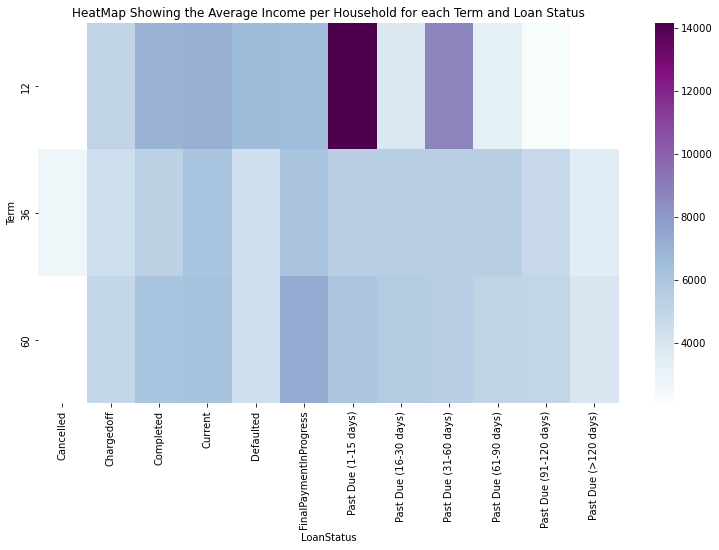

In [27]:
multivariate = data.groupby(['Term', 'LoanStatus'])['StatedMonthlyIncome'].mean()
multivariate = multivariate.reset_index(name = 'Average Individual Monthly Income')
multivariate = multivariate.pivot(index = 'Term', columns = 'LoanStatus', values = 'Average Individual Monthly Income')
plt.figure(figsize = (13,7))
sb.heatmap(multivariate, cmap = 'BuPu')
plt.title('HeatMap Showing the Average Income per Household for each Term and Loan Status');

In [32]:
!jupyter nbconvert Part_II_Prosper_Loan_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_Analysis.ipynb to slides
[NbConvertApp] Writing 624468 bytes to Part_II_Prosper_Loan_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(noteb